<a href="https://colab.research.google.com/github/kumoromilee/bsc_dpdm22/blob/main/%5Bdataprep%5D_property_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# สรุปข้อมูลของนักประเมินแต่ละคน โดยพิจารณาจาก ความมั่นใจในการประเมิน ประเมินราคาซื้อ-ขาย ให้คะแนนทรัพย์

##เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์แต่ละทรัพย์ของนักประเมินแต่ละคนและของราคาตั้งขาย


In [133]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
import os
os.chdir('/content/drive/MyDrive/bsc_DPDM_data/')

!pwd 

/content/drive/MyDrive/bsc_DPDM_data


In [135]:
!ls

 thsarabunnew-webfont.ttf       คำตอบนักประเมินเดิม.xlsx
'คำตอบนักประเมิน update.gsheet'   คำตอบนักประเมินใหม่.xlsx
'คำตอบนักประเมิน update.xlsx'     คำตอบนักประเมินแก้ไข.xlsx


In [136]:
import pandas as pd

In [137]:
home = pd.read_excel('คำตอบนักประเมินเดิม.xlsx',sheet_name='บ้าน')
home.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,100.0
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN


## นักประเมินคนที่ 1

In [138]:
est1 = home[home['ID ผู้ประเมิน']==1]
est1.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,100.0
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN


In [139]:
est1.describe()['ประเมินราคาซื้อ-ขาย']

count    1.000000e+02
mean     3.938500e+06
std      2.368553e+06
min      6.000000e+05
25%      2.775000e+06
50%      3.600000e+06
75%      4.500000e+06
max      1.600000e+07
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [140]:
est1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [141]:
#!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')
     

In [142]:
from matplotlib import pyplot as plt

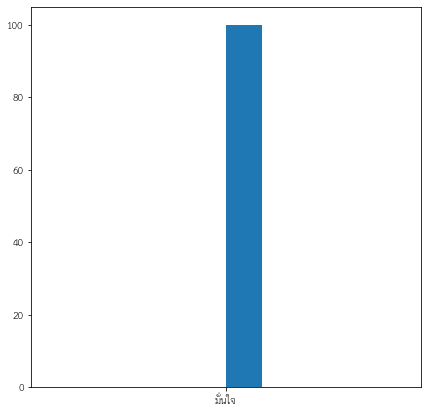

In [143]:
ret1_conf = plt.hist(est1['ความมั่นใจในการเมินราคาทรัพย์'])

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

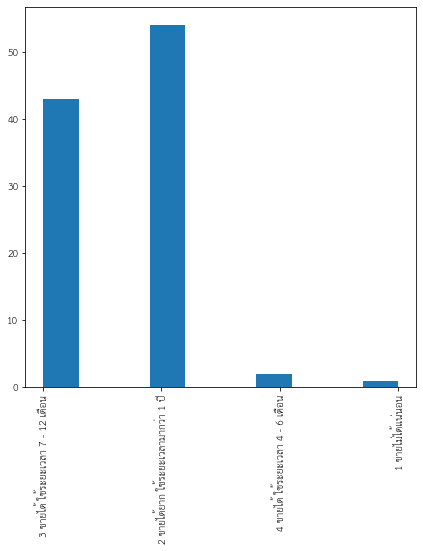

In [144]:
ret1_score = plt.hist(est1['ให้คะแนนทรัพย์'])
plt.xticks(rotation='vertical')

In [145]:
ret1_score

(array([43.,  0.,  0., 54.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

In [146]:
est1['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    54
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     43
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       2
1 ขายไม่ได้แน่นอน                      1
Name: ให้คะแนนทรัพย์, dtype: int64

In [147]:
est1.groupby('ให้คะแนนทรัพย์')['ให้คะแนนทรัพย์'].count()

ให้คะแนนทรัพย์
1 ขายไม่ได้แน่นอน                      1
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    54
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     43
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       2
Name: ให้คะแนนทรัพย์, dtype: int64

## นักประเมินคนที่ 2

In [148]:
est2 = home[home['ID ผู้ประเมิน']==2]
print(f'ประเมินทั้งหมด {len(est2)}')

ประเมินทั้งหมด 90


In [149]:
est2.describe()['ประเมินราคาซื้อ-ขาย']

count    8.900000e+01
mean     4.153258e+06
std      2.386901e+06
min      9.900000e+05
25%      2.600000e+06
50%      3.900000e+06
75%      4.900000e+06
max      1.700000e+07
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [150]:
est2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ       89
ไม่มั่นใจ     1
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [151]:
est2['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     64
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      23
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน      1
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     1
Name: ให้คะแนนทรัพย์, dtype: int64

#HW 1

เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์แต่ละทรัพย์ของนักประเมินแต่ละคนและของราคาตั้งขายใช้ MAPE ในการเปรียบเทียบ

### Home

In [152]:
est2['ประเมิน1'] = est2['post id'].map(est1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);

<ipython-input-152-dadc5741adfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2['ประเมิน1'] = est2['post id'].map(est1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


In [153]:
est2['ประเมิน2'] = est2['post id'].map(est2.set_index('post id')['ประเมินราคาซื้อ-ขาย']);

<ipython-input-153-06f9de26e0cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2['ประเมิน2'] = est2['post id'].map(est2.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


#### Table 

In [154]:
assess = est2[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2']]
assess = assess.dropna(subset=['ราคาทรัพย์','ประเมิน1','ประเมิน2'])
assess

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000.0,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0
7,https://nayoo.co/khonkaen/posts/564,4400000.0,3500000.0,3700000.0
9,https://nayoo.co/khonkaen/posts/566,2750000.0,2500000.0,2500000.0
...,...,...,...,...
185,https://nayoo.co/khonkaen/posts/19495,5500000.0,4500000.0,5000000.0
186,https://nayoo.co/khonkaen/posts/19496,7911000.0,5200000.0,7400000.0
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0
188,https://nayoo.co/khonkaen/posts/31,4000000.0,4000000.0,3900000.0


In [155]:
assess.isnull().sum()

post id       0
ราคาทรัพย์    0
ประเมิน1      0
ประเมิน2      0
dtype: int64

#### MAPE 

In [156]:
from sklearn.metrics import mean_absolute_percentage_error as mape

In [157]:
actual = assess['ราคาทรัพย์']
pre1 = assess['ประเมิน1']
pre2 = assess['ประเมิน2']

In [158]:
pred1 = mape(actual, pre1)
pred2 = mape(actual, pre2)
mapeh1 = mape(pre1,pre2)
mapeh2 = mape(pre2,pre1)
meanh12 = (mapeh1 + mapeh2)/2

In [159]:
print(f'ผู้ประเมินคนที่ 1 ได้ค่า MAPE เท่ากับ {pred1*100:.2f}%\nผู้ประเมินคนที่ 2 ได้ค่า MAPE เท่ากับ {pred2*100:.2f}%\nความผิดพลาดระหว่างนักประเมินทั้ง 2 คน เท่ากับ {meanh12*100:.2f}%')

ผู้ประเมินคนที่ 1 ได้ค่า MAPE เท่ากับ 12.32%
ผู้ประเมินคนที่ 2 ได้ค่า MAPE เท่ากับ 10.42%
ความผิดพลาดระหว่างนักประเมินทั้ง 2 คน เท่ากับ 12.60%


### Land

In [160]:
land = pd.read_excel('คำตอบนักประเมินเดิม.xlsx',sheet_name='ที่ดิน')
land.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,1800000.0,"8,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,100.0
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN
2,4,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,3000000.0,12000-18000,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN


In [161]:
land['ID ผู้ประเมิน'].value_counts()

1    100
2    100
4     10
Name: ID ผู้ประเมิน, dtype: int64

In [162]:
est1_l = land[land['ID ผู้ประเมิน']==1]

In [163]:
est2_l = land[land['ID ผู้ประเมิน']==2]

In [164]:
est2_l['ประเมิน1'] = est2_l['post id'].map(est1_l.set_index('post id')['ประเมินราคาซื้อ-ขาย']);

<ipython-input-164-c6430982f1d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2_l['ประเมิน1'] = est2_l['post id'].map(est1_l.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


In [165]:
est2_l['ประเมิน2'] = est2_l['post id'].map(est2_l.set_index('post id')['ประเมินราคาซื้อ-ขาย']);

<ipython-input-165-450ec50337ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2_l['ประเมิน2'] = est2_l['post id'].map(est2_l.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


#### Table

In [166]:
assess_l = est2_l[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2']]
assess_l

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0
...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0
204,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0
206,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0


In [167]:
assess_l.isnull().sum() 

post id       0
ราคาทรัพย์    0
ประเมิน1      0
ประเมิน2      0
dtype: int64

#### MAPE 

In [168]:
actual_l = assess_l['ราคาทรัพย์']
pre_l = assess_l['ประเมิน1']
pre_l2 = assess_l['ประเมิน2']

In [169]:
pred1_l = mape(actual_l, pre_l)
pred2_l = mape(actual_l, pre_l2)
mapel = mape(pre_l,pre_l2)
mapel2 = mape(pre_l2,pre_l)
meanl12 = (mapel + mapel2)/2

In [170]:
print(f'ผู้ประเมินคนที่ 1 ได้ค่า MAPE เท่ากับ {pred1_l:.2f} \nผู้ประเมินคนที่ 2 ได้ค่า MAPE เท่ากับ {pred2_l:.2f}\nความผิดพลาดระหว่างนักประเมินทั้ง 2 คน เท่ากับ {meanl12*100:.2f}%')

ผู้ประเมินคนที่ 1 ได้ค่า MAPE เท่ากับ 0.41 
ผู้ประเมินคนที่ 2 ได้ค่า MAPE เท่ากับ 0.40
ความผิดพลาดระหว่างนักประเมินทั้ง 2 คน เท่ากับ 58.41%


### Condo

In [171]:
condo = pd.read_excel('คำตอบนักประเมินเดิม.xlsx',sheet_name='คอนโด')
condo.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10
0,1,32.0,คอนโด,มั่นใจ,3500000.0,3500000.0,"60,000-130,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1,1,36.0,คอนโด,มั่นใจ,1930000.0,2200000.0,"50,000-90,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
2,1,603.0,คอนโด,มั่นใจ,2438000.0,2800000.0,"35,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [172]:
condo['ID ผู้ประเมิน'].value_counts()

1    10
Name: ID ผู้ประเมิน, dtype: int64

In [173]:
condo.rename(columns={'ประเมินราคาซื้อ-ขาย':'ประเมิน1'}, inplace=True)

#### Table

In [174]:
assess_c = condo[['post id','ราคาทรัพย์','ประเมิน1']]
assess_c

,post id,ราคาทรัพย์,ประเมิน1
0,32.0,3500000.0,3500000.0
1,36.0,1930000.0,2200000.0
2,603.0,2438000.0,2800000.0
3,1395.0,1600000.0,2300000.0
4,1443.0,1860000.0,1800000.0
5,1609.0,1490000.0,1500000.0
6,1640.0,1280000.0,1600000.0
7,1641.0,4290000.0,2700000.0
8,1650.0,1700000.0,1550000.0
9,1840.0,3790000.0,2800000.0


#### MAPE

In [175]:
actual_c = assess_c['ราคาทรัพย์']
pre_c = assess_c['ประเมิน1']
pred1_c = mape(actual_c, pre_c)

In [176]:
print(f'ผู้ประเมินคนที่ 1 ได้ค่า MAPE เท่ากับ {pred1_c:.2f}')

ผู้ประเมินคนที่ 1 ได้ค่า MAPE เท่ากับ 0.17


###Townhome

In [177]:
town = pd.read_excel('คำตอบนักประเมินเดิม.xlsx',sheet_name='ทาวน์โฮม')
town.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,120.0
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,1500000.0,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN


In [178]:
town['ID ผู้ประเมิน'].value_counts()

1    120
2    120
Name: ID ผู้ประเมิน, dtype: int64

In [179]:
est1_t = town[town['ID ผู้ประเมิน']==1]

In [180]:
est2_t = town[town['ID ผู้ประเมิน']==2]

In [181]:
est2_t['ประเมิน1'] = est2_t['post id'].map(est1_t.set_index('post id')['ประเมินราคาซื้อ-ขาย']);

<ipython-input-181-34da30f31d1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2_t['ประเมิน1'] = est2_t['post id'].map(est1_t.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


In [182]:
est2_t['ประเมิน2'] = est2_t['post id'].map(est2_t.set_index('post id')['ประเมินราคาซื้อ-ขาย']);

<ipython-input-182-e952ecd63c9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2_t['ประเมิน2'] = est2_t['post id'].map(est2_t.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


#### Table

In [183]:
assess_t = est2_t[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2']]
assess_t

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/548,1045000.0,700000.0,1500000.0
3,https://nayoo.co/khonkaen/posts/549,935000.0,700000.0,1500000.0
5,https://nayoo.co/khonkaen/posts/579,3520000.0,3500000.0,4000000.0
7,https://nayoo.co/khonkaen/posts/580,3850000.0,3500000.0,3200000.0
9,https://nayoo.co/khonkaen/posts/582,990000.0,1000000.0,800000.0
...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1430000.0,1000000.0,1200000.0
236,https://nayoo.co/khonkaen/posts/18551,1980000.0,1500000.0,1700000.0
237,https://nayoo.co/khonkaen/posts/19434,2000000.0,1600000.0,1900000.0
238,https://nayoo.co/khonkaen/posts/19501,1790000.0,1600000.0,1700000.0


In [184]:
assess_t.isnull().sum() 

post id       0
ราคาทรัพย์    0
ประเมิน1      0
ประเมิน2      0
dtype: int64

#### MAPE 

In [185]:
actual_t = assess_t['ราคาทรัพย์']
pre_t = assess_t['ประเมิน1']
pre_t2 = assess_t['ประเมิน2']

In [186]:
pred1_t = mape(actual_t, pre_t)
pred2_t = mape(actual_t, pre_t2)
mapet = mape(pre_t,pre_t2)
mapet2 = mape(pre_t2,pre_t)
meant12 = (mapet + mapet2)/2

In [187]:
print(f'ผู้ประเมินคนที่ 1 ได้ค่า MAPE เท่ากับ {pred1_t:.2f}\nผู้ประเมินคนที่ 2 ได้ค่า MAPE เท่ากับ {pred2_t:.2f}\nความผิดพลาดระหว่างนักประเมินทั้ง 2 คน เท่ากับ {meanl12*100:.2f}%')

ผู้ประเมินคนที่ 1 ได้ค่า MAPE เท่ากับ 0.11
ผู้ประเมินคนที่ 2 ได้ค่า MAPE เท่ากับ 0.09
ความผิดพลาดระหว่างนักประเมินทั้ง 2 คน เท่ากับ 58.41%


### Shop house 

In [188]:
shoph = pd.read_excel('คำตอบนักประเมินเดิม.xlsx',sheet_name='อาคารพาณิชย์')
shoph.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,6000000.0,"8,000-30,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN,10.0
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,"8,000-40,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN


In [189]:
shoph['ID ผู้ประเมิน'].value_counts()

1    10
2    10
Name: ID ผู้ประเมิน, dtype: int64

In [190]:
est1_s = shoph[shoph['ID ผู้ประเมิน']==1]

In [191]:
est2_s = shoph[shoph['ID ผู้ประเมิน']==2]

In [192]:
est2_s['ประเมิน1'] = est2_s['post id'].map(est1_s.set_index('post id')['ประเมินราคาซื้อ-ขาย']);

<ipython-input-192-dbcb5b2fbe34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2_s['ประเมิน1'] = est2_s['post id'].map(est1_s.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


In [193]:
est2_s['ประเมิน2'] = est2_s['post id'].map(est2_s.set_index('post id')['ประเมินราคาซื้อ-ขาย']);

<ipython-input-193-343d57685f7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2_s['ประเมิน2'] = est2_s['post id'].map(est2_s.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


In [194]:
est2_s

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,ประเมิน1,ประเมิน2
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,6000000.0,8000000.0
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,ราคาเสนอขาย 4 - 5 ล้านบาท/คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN,12000000.0,12000000.0
5,2,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000.0,20000000.0,ราคาเสนอขาย 6-8 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN,NaN,13500000.0,20000000.0
7,2,https://nayoo.co/khonkaen/posts/22,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3500000.0,4000000.0,ราคาเสนอขาย 3-5 ล้านบาท/คูหา,NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,4000000.0,4000000.0
9,2,https://nayoo.co/khonkaen/posts/24,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000.0,3000000.0,ราคาซื้อขาย 3-4 ล้านบาท / คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN,2200000.0,3000000.0
11,2,https://nayoo.co/khonkaen/posts/30,อาคารพาณิชย์/สำนักงาน,มั่นใจ,4800000.0,4000000.0,ราคาเสนอขาย 4 - 5 ล้านบาท/ คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN,3600000.0,4000000.0
13,2,https://nayoo.co/khonkaen/posts/35,อาคารพาณิชย์/สำนักงาน,มั่นใจ,2400000.0,2100000.0,ราคาเสนอขาย 2-2.5 ล้านบาท / คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN,2500000.0,2100000.0
15,2,https://nayoo.co/khonkaen/posts/497,อาคารพาณิชย์/สำนักงาน,มั่นใจ,5000000.0,5000000.0,ราคาเสนอขาย 5 - 7 ล้านบาท / คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN,3800000.0,5000000.0
17,2,https://nayoo.co/khonkaen/posts/498,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,ราคาเสนอขาย 8-10 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN,NaN,7000000.0,8000000.0
19,2,https://nayoo.co/khonkaen/posts/499,อาคารพาณิชย์/สำนักงาน,มั่นใจ,9000000.0,10000000.0,ราคาเสนอขาย 5-6 ล้านบาท/คูหา,NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,8000000.0,10000000.0


#### Table

In [195]:
assess_s = est2_s[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2']]
assess_s

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0
7,https://nayoo.co/khonkaen/posts/22,3500000.0,4000000.0,4000000.0
9,https://nayoo.co/khonkaen/posts/24,3900000.0,2200000.0,3000000.0
11,https://nayoo.co/khonkaen/posts/30,4800000.0,3600000.0,4000000.0
13,https://nayoo.co/khonkaen/posts/35,2400000.0,2500000.0,2100000.0
15,https://nayoo.co/khonkaen/posts/497,5000000.0,3800000.0,5000000.0
17,https://nayoo.co/khonkaen/posts/498,7000000.0,7000000.0,8000000.0
19,https://nayoo.co/khonkaen/posts/499,9000000.0,8000000.0,10000000.0


In [196]:
assess_s.isnull().sum() 

post id       0
ราคาทรัพย์    0
ประเมิน1      0
ประเมิน2      0
dtype: int64

#### MAPE 

In [197]:
actual_s = assess_s['ราคาทรัพย์']
pre_s = assess_s['ประเมิน1']
pre_s2 = assess_s['ประเมิน2']

In [198]:
pred1_s = mape(actual_s, pre_s)
pred2_s = mape(actual_s, pre_s2)
mapes = mape(pre_s,pre_s2)
mapes2 = mape(pre_s2,pre_s)
means12 = (mapes + mapes2)/2

In [199]:
print(f'ผู้ประเมินคนที่ 1 ได้ค่า MAPE เท่ากับ {pred1_s*100:.2f}%\nผู้ประเมินคนที่ 2 ได้ค่า MAPE เท่ากับ {pred2_s*100:.2f}%\nความผิดพลาดระหว่างนักประเมินทั้ง 2 คน เท่ากับ {means12*100:.2f}%')

ผู้ประเมินคนที่ 1 ได้ค่า MAPE เท่ากับ 17.64%
ผู้ประเมินคนที่ 2 ได้ค่า MAPE เท่ากับ 11.73%
ความผิดพลาดระหว่างนักประเมินทั้ง 2 คน เท่ากับ 19.28%


## เขียน function ตรวจสอบค่าที่เติม 0 ผิด

In [200]:
max(10,2)

10

In [201]:
def check_v(in1,in2):
    return max(in1/in2,in2/in1)

In [202]:
check_v(100,12)

8.333333333333334

In [203]:
check_v(100,1200)

12.0

## สร้าง column ใหม่ ลงในตาราง home โดย ค่าใน column คือค่า จาก function check(ราคาตั้งขาย,ราคาประเมิน1)

In [204]:
check1 = list()
for row in assess.iterrows():
    check1.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมิน1']))
check1

[1.08,
 1.1818181818181819,
 1.18,
 1.2571428571428571,
 1.1,
 1.271111111111111,
 1.36,
 1.0153846153846153,
 1.3684,
 1.031941031941032,
 1.0476190476190477,
 1.1785714285714286,
 1.0592592592592593,
 1.188,
 1.1275,
 1.1,
 1.1157142857142857,
 1.0371428571428571,
 1.0588235294117647,
 1.2571428571428571,
 1.13125,
 1.0,
 1.0888888888888888,
 1.0892333472978635,
 1.0444444444444445,
 1.0,
 1.0434782608695652,
 1.02,
 1.25,
 1.13,
 1.0714285714285714,
 1.0,
 1.0,
 1.3833333333333333,
 1.03125,
 1.1611111111111112,
 1.0526315789473684,
 1.5384615384615385,
 1.0227272727272727,
 1.1363636363636365,
 1.1111111111111112,
 1.1290322580645162,
 1.1388888888888888,
 1.0,
 1.0933333333333333,
 1.3093125,
 1.21,
 1.24,
 1.1642857142857144,
 1.1,
 1.4685314685314685,
 1.1111111111111112,
 1.1942857142857144,
 1.0714285714285714,
 1.0710526315789475,
 1.4575,
 1.046,
 1.09375,
 1.044932079414838,
 1.1090909090909091,
 1.1333333333333333,
 1.1866666666666668,
 1.036,
 1.0031347962382444,
 1.06060

# HW2 
แก้ไข ข้อมูลแล้วคำนวณ MAPE ใหม่อีกรอบมาเทียบกัน

### Check Home

In [205]:
assess['check1']=assess.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
assess['check2']=assess.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)

In [206]:
assess.sort_values(by=['check1'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0,1.800000,1.250000
75,https://nayoo.co/khonkaen/posts/1,390000.0,600000.0,1300000.0,1.538462,3.333333
177,https://nayoo.co/khonkaen/posts/19450,2100000.0,3200000.0,2200000.0,1.523810,1.047619
186,https://nayoo.co/khonkaen/posts/19496,7911000.0,5200000.0,7400000.0,1.521346,1.069054
101,https://nayoo.co/khonkaen/posts/6010,2860000.0,4200000.0,3000000.0,1.468531,1.048951
...,...,...,...,...,...,...
167,https://nayoo.co/khonkaen/posts/9141,3500000.0,3500000.0,3600000.0,1.000000,1.028571
51,https://nayoo.co/khonkaen/posts/1149,4000000.0,4000000.0,4500000.0,1.000000,1.125000
63,https://nayoo.co/khonkaen/posts/2033,1200000.0,1200000.0,1000000.0,1.000000,1.200000
188,https://nayoo.co/khonkaen/posts/31,4000000.0,4000000.0,3900000.0,1.000000,1.025641


In [207]:
assess.sort_values(by=['check2'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
75,https://nayoo.co/khonkaen/posts/1,390000.0,600000.0,1300000.0,1.538462,3.333333
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0,1.180000,1.525424
111,https://nayoo.co/khonkaen/posts/6045,2915000.0,2000000.0,2000000.0,1.457500,1.457500
83,https://nayoo.co/khonkaen/posts/3721,3100000.0,3500000.0,4000000.0,1.129032,1.290323
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0,1.800000,1.250000
...,...,...,...,...,...,...
169,https://nayoo.co/khonkaen/posts/11264,6500000.0,5600000.0,6500000.0,1.160714,1.000000
69,https://nayoo.co/khonkaen/posts/2262,3200000.0,3300000.0,3200000.0,1.031250,1.000000
57,https://nayoo.co/khonkaen/posts/1895,1200000.0,1500000.0,1200000.0,1.250000,1.000000
37,https://nayoo.co/khonkaen/posts/760,1800000.0,1700000.0,1800000.0,1.058824,1.000000


#### MAPE เก่า

In [208]:
temph = pd.read_excel('คำตอบนักประเมินเดิม.xlsx',sheet_name='บ้าน')
idh1 = temph[temph['ID ผู้ประเมิน']==1]
idh1 = idh1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
idh2 = temph[temph['ID ผู้ประเมิน']==2]
idh2 = idh2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
idh1MAPE = mape(idh1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(idh1['ราคาทรัพย์']))
idh2MAPE = mape(idh2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(idh2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {idh1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {idh2MAPE*100:.2f}%')
idh2['ประเมิน2'] = idh2['post id'].map(idh1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
idh2_d = idh2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])
one2twoh = mape(idh2_d['ประเมินราคาซื้อ-ขาย'],idh2_d['ประเมิน2'])
two2oneh = mape(idh2_d['ประเมิน2'],idh2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((one2twoh)+(two2oneh))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(idh2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 13.00%
นักประเมิน คนที่ 2 = 8.52%
ความผิดพลาดระหว่างนักประเมินทั้ง 12.60%
จำนวนทรัพย์ทั้งหมด 89 ทรัพย์


#### MAPE ใหม่

In [209]:
temph = pd.read_excel('คำตอบนักประเมินแก้ไข.xlsx',sheet_name='บ้าน')
idh1 = temph[temph['ID ผู้ประเมิน']==1]
idh1 = idh1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
idh2 = temph[temph['ID ผู้ประเมิน']==2]
idh2 = idh2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
idh1MAPE = mape(idh1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(idh1['ราคาทรัพย์']))
idh2MAPE = mape(idh2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(idh2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {idh1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {idh2MAPE*100:.2f}%')
idh2['ประเมิน2'] = idh2['post id'].map(idh1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
idh2_d = idh2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])
one2twoh = mape(idh2_d['ประเมินราคาซื้อ-ขาย'],idh2_d['ประเมิน2'])
two2oneh = mape(idh2_d['ประเมิน2'],idh2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((one2twoh)+(two2oneh))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(idh2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 13.75%
นักประเมิน คนที่ 2 = 11.65%
ความผิดพลาดระหว่างนักประเมินทั้ง 15.75%
จำนวนทรัพย์ทั้งหมด 61 ทรัพย์


### Check  Land

In [210]:
assess_l['check1']=assess_l.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
assess_l['check2']=assess_l.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)

<ipython-input-210-4844760eb5d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assess_l['check1']=assess_l.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
<ipython-input-210-4844760eb5d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assess_l['check2']=assess_l.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)


In [211]:
assess_l.sort_values(by=['check1'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
194,https://nayoo.co/khonkaen/posts/13702,90000000,4500000.0,75000000.0,20.000000,1.200000
112,https://nayoo.co/khonkaen/posts/7955,2600000,32000000.0,2000000.0,12.307692,1.300000
58,https://nayoo.co/khonkaen/posts/9203,160000000,14000000.0,11000000.0,11.428571,14.545455
47,https://nayoo.co/khonkaen/posts/7349,245000000,24000000.0,18000000.0,10.208333,13.611111
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0,5.000000,1.285714
...,...,...,...,...,...,...
182,https://nayoo.co/khonkaen/posts/9598,3900000,4000000.0,4000000.0,1.025641,1.025641
78,https://nayoo.co/khonkaen/posts/3447,980000,1000000.0,800000.0,1.020408,1.225000
100,https://nayoo.co/khonkaen/posts/1663,1485000,1500000.0,1200000.0,1.010101,1.237500
122,https://nayoo.co/khonkaen/posts/12762,650000,650000.0,700000.0,1.000000,1.076923


In [212]:
assess_l.sort_values(by=['check2'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
58,https://nayoo.co/khonkaen/posts/9203,160000000,14000000.0,11000000.0,11.428571,14.545455
47,https://nayoo.co/khonkaen/posts/7349,245000000,24000000.0,18000000.0,10.208333,13.611111
148,https://nayoo.co/khonkaen/posts/3561,7374550,6000000.0,80000000.0,1.229092,10.848120
188,https://nayoo.co/khonkaen/posts/12250,2300000,2500000.0,24000000.0,1.086957,10.434783
144,https://nayoo.co/khonkaen/posts/3341,1700000,1600000.0,9000000.0,1.062500,5.294118
...,...,...,...,...,...,...
104,https://nayoo.co/khonkaen/posts/1921,8080000,2800000.0,8000000.0,2.885714,1.010000
60,https://nayoo.co/khonkaen/posts/12607,7990000,10000000.0,8000000.0,1.251564,1.001252
158,https://nayoo.co/khonkaen/posts/6732,3500000,2800000.0,3500000.0,1.250000,1.000000
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0,1.500000,1.000000


#### MAPE เก่า

In [213]:
templ = pd.read_excel('คำตอบนักประเมินเดิม.xlsx',sheet_name='ที่ดิน')
idl1 = templ[templ['ID ผู้ประเมิน']==1]
idl1 = idl1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
idl2 = templ[templ['ID ผู้ประเมิน']==2]
idl2 = idl2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
idl1MAPE = mape(idl1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(idl1['ราคาทรัพย์']))
idl2MAPE = mape(idl2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(idl2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {idl1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {idl2MAPE*100:.2f}%')
idl2['ประเมิน2'] = idl2['post id'].map(idl1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
idl2_d = idl2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])
one2twol = mape(idl2_d['ประเมินราคาซื้อ-ขาย'],idl2_d['ประเมิน2'])
two2onel = mape(idl2_d['ประเมิน2'],idl2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((one2twol)+(two2onel))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(idl2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 83.48%
นักประเมิน คนที่ 2 = 48.38%
ความผิดพลาดระหว่างนักประเมินทั้ง 58.41%
จำนวนทรัพย์ทั้งหมด 100 ทรัพย์


#### MAPE ใหม่

In [214]:
templ = pd.read_excel('คำตอบนักประเมินแก้ไข.xlsx',sheet_name='ที่ดิน')
idl1 = templ[templ['ID ผู้ประเมิน']==1]
idl1 = idl1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
idl2 = templ[templ['ID ผู้ประเมิน']==2]
idl2 = idl2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
idl1MAPE = mape(idl1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(idl1['ราคาทรัพย์']))
idl2MAPE = mape(idl2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(idl2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {idl1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {idl2MAPE*100:.2f}%')
idl2['ประเมิน2'] = idl2['post id'].map(idl1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
idl2_d = idl2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])
one2twol = mape(idl2_d['ประเมินราคาซื้อ-ขาย'],idl2_d['ประเมิน2'])
two2onel = mape(idl2_d['ประเมิน2'],idl2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((one2twol)+(two2onel))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(idl2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 39.11%
นักประเมิน คนที่ 2 = 24.01%
ความผิดพลาดระหว่างนักประเมินทั้ง 33.16%
จำนวนทรัพย์ทั้งหมด 40 ทรัพย์


### Check Townhome

In [215]:
assess_t['check1']=assess_t.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
assess_t['check2']=assess_t.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)

<ipython-input-215-81254fa889fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assess_t['check1']=assess_t.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
<ipython-input-215-81254fa889fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assess_t['check2']=assess_t.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)


In [216]:
assess_t.sort_values(by=['check1'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
176,https://nayoo.co/khonkaen/posts/3528,2190000.0,350000.0,400000.0,6.257143,5.475000
180,https://nayoo.co/khonkaen/posts/6095,2420000.0,1500000.0,1500000.0,1.613333,1.613333
132,https://nayoo.co/khonkaen/posts/619,1430000.0,950000.0,1000000.0,1.505263,1.430000
1,https://nayoo.co/khonkaen/posts/548,1045000.0,700000.0,1500000.0,1.492857,1.435407
174,https://nayoo.co/khonkaen/posts/3478,2190000.0,1500000.0,2200000.0,1.460000,1.004566
...,...,...,...,...,...,...
228,https://nayoo.co/khonkaen/posts/17923,1990000.0,2000000.0,2200000.0,1.005025,1.105528
167,https://nayoo.co/khonkaen/posts/2829,2490000.0,2500000.0,2300000.0,1.004016,1.082609
220,https://nayoo.co/khonkaen/posts/17545,2800000.0,2800000.0,2800000.0,1.000000,1.000000
200,https://nayoo.co/khonkaen/posts/13411,3200000.0,3200000.0,3200000.0,1.000000,1.000000


In [217]:
assess_t.sort_values(by=['check2'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
176,https://nayoo.co/khonkaen/posts/3528,2190000.0,350000.0,400000.0,6.257143,5.475000
234,https://nayoo.co/khonkaen/posts/18090,3000000.0,2800000.0,1500000.0,1.071429,2.000000
180,https://nayoo.co/khonkaen/posts/6095,2420000.0,1500000.0,1500000.0,1.613333,1.613333
3,https://nayoo.co/khonkaen/posts/549,935000.0,700000.0,1500000.0,1.335714,1.604278
225,https://nayoo.co/khonkaen/posts/17742,2500000.0,2200000.0,1700000.0,1.136364,1.470588
...,...,...,...,...,...,...
188,https://nayoo.co/khonkaen/posts/8101,3200000.0,3300000.0,3200000.0,1.031250,1.000000
220,https://nayoo.co/khonkaen/posts/17545,2800000.0,2800000.0,2800000.0,1.000000,1.000000
199,https://nayoo.co/khonkaen/posts/12957,1500000.0,1600000.0,1500000.0,1.066667,1.000000
151,https://nayoo.co/khonkaen/posts/1978,2500000.0,2700000.0,2500000.0,1.080000,1.000000


#### MAPE เก่า

In [218]:
tempt = pd.read_excel('คำตอบนักประเมินเดิม.xlsx',sheet_name='ทาวน์โฮม')
idt1 = tempt[tempt['ID ผู้ประเมิน']==1]
idt1 = idt1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
idt2 = tempt[tempt['ID ผู้ประเมิน']==2]
idt2 = idt2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
idt1MAPE = mape(idt1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(idt1['ราคาทรัพย์']))
idt2MAPE = mape(idt2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(idt2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nทาวน์โฮม\nนักประเมิน คนที่ 1 = {idt1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {idt2MAPE*100:.2f}%')
idt2['ประเมิน2'] = idt2['post id'].map(idt1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
idt2_d = idt2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])
one2twot = mape(idt2_d['ประเมินราคาซื้อ-ขาย'],idt2_d['ประเมิน2'])
two2onet = mape(idt2_d['ประเมิน2'],idt2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((one2twot)+(two2onet))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(idt2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ทาวน์โฮม
นักประเมิน คนที่ 1 = 16.21%
นักประเมิน คนที่ 2 = 12.75%
ความผิดพลาดระหว่างนักประเมินทั้ง 10.92%
จำนวนทรัพย์ทั้งหมด 120 ทรัพย์


#### MAPE ใหม่

In [219]:
tempt = pd.read_excel('คำตอบนักประเมินแก้ไข.xlsx',sheet_name='ทาวน์โฮม')
idt1 = tempt[tempt['ID ผู้ประเมิน']==1]
idt1 = idt1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
idt2 = tempt[tempt['ID ผู้ประเมิน']==2]
idt2 = idt2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
idt1MAPE = mape(idt1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(idt1['ราคาทรัพย์']))
idt2MAPE = mape(idt2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(idt2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nทาวน์โฮม\nนักประเมิน คนที่ 1 = {idt1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {idt2MAPE*100:.2f}%')
idt2['ประเมิน2'] = idt2['post id'].map(idt1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
idt2_d = idt2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])
one2twot = mape(idt2_d['ประเมินราคาซื้อ-ขาย'],idt2_d['ประเมิน2'])
two2onet = mape(idt2_d['ประเมิน2'],idt2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((one2twot)+(two2onet))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(idt2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ทาวน์โฮม
นักประเมิน คนที่ 1 = 11.69%
นักประเมิน คนที่ 2 = 8.64%
ความผิดพลาดระหว่างนักประเมินทั้ง 11.63%
จำนวนทรัพย์ทั้งหมด 60 ทรัพย์


### Check Shop house 

In [220]:
assess_s['check1']=assess_s.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
assess_s['check2']=assess_s.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)

<ipython-input-220-108066cf74f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assess_s['check1']=assess_s.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
<ipython-input-220-108066cf74f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assess_s['check2']=assess_s.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)


In [221]:
assess_s.sort_values(by=['check1'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
9,https://nayoo.co/khonkaen/posts/24,3900000.0,2200000.0,3000000.0,1.772727,1.300000
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0,1.666667,1.125000
11,https://nayoo.co/khonkaen/posts/30,4800000.0,3600000.0,4000000.0,1.333333,1.200000
15,https://nayoo.co/khonkaen/posts/497,5000000.0,3800000.0,5000000.0,1.315789,1.000000
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0,1.166667,1.142857
7,https://nayoo.co/khonkaen/posts/22,3500000.0,4000000.0,4000000.0,1.142857,1.142857
19,https://nayoo.co/khonkaen/posts/499,9000000.0,8000000.0,10000000.0,1.125000,1.111111
13,https://nayoo.co/khonkaen/posts/35,2400000.0,2500000.0,2100000.0,1.041667,1.142857
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0,1.000000,1.000000
17,https://nayoo.co/khonkaen/posts/498,7000000.0,7000000.0,8000000.0,1.000000,1.142857


In [222]:
assess_s.sort_values(by=['check2'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
9,https://nayoo.co/khonkaen/posts/24,3900000.0,2200000.0,3000000.0,1.772727,1.300000
11,https://nayoo.co/khonkaen/posts/30,4800000.0,3600000.0,4000000.0,1.333333,1.200000
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0,1.166667,1.142857
7,https://nayoo.co/khonkaen/posts/22,3500000.0,4000000.0,4000000.0,1.142857,1.142857
13,https://nayoo.co/khonkaen/posts/35,2400000.0,2500000.0,2100000.0,1.041667,1.142857
17,https://nayoo.co/khonkaen/posts/498,7000000.0,7000000.0,8000000.0,1.000000,1.142857
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0,1.666667,1.125000
19,https://nayoo.co/khonkaen/posts/499,9000000.0,8000000.0,10000000.0,1.125000,1.111111
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0,1.000000,1.000000
15,https://nayoo.co/khonkaen/posts/497,5000000.0,3800000.0,5000000.0,1.315789,1.000000


#### MAPE 


In [223]:
temps = pd.read_excel('คำตอบนักประเมินเดิม.xlsx',sheet_name='อาคารพาณิชย์')
ids1 = temps[temps['ID ผู้ประเมิน']==1]
ids1 = ids1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
ids2 = temps[temps['ID ผู้ประเมิน']==2]
ids2 = ids2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
ids1MAPE = mape(ids1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(ids1['ราคาทรัพย์']))
ids2MAPE = mape(ids2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(ids2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nอาคารพาณิชย์\nนักประเมิน คนที่ 1 = {ids1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {ids2MAPE*100:.2f}%')
ids2['ประเมิน2'] = ids2['post id'].map(ids1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
ids2_d = ids2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])
one2twos = mape(ids2_d['ประเมินราคาซื้อ-ขาย'],ids2_d['ประเมิน2'])
two2ones = mape(ids2_d['ประเมิน2'],ids2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((one2twos)+(two2ones))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(ids2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
อาคารพาณิชย์
นักประเมิน คนที่ 1 = 25.45%
นักประเมิน คนที่ 2 = 12.43%
ความผิดพลาดระหว่างนักประเมินทั้ง 19.28%
จำนวนทรัพย์ทั้งหมด 10 ทรัพย์


In [224]:
temps = pd.read_excel('คำตอบนักประเมินใหม่.xlsx',sheet_name='อาคารพาณิชย์')
ids1 = temps[temps['ID ผู้ประเมิน']==1]
ids1 = ids1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
ids2 = temps[temps['ID ผู้ประเมิน']==2]
ids2 = ids2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
ids1MAPE = mape(ids1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(ids1['ราคาทรัพย์']))
ids2MAPE = mape(ids2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(ids2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nอาคารพาณิชย์\nนักประเมิน คนที่ 1 = {ids1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {ids2MAPE*100:.2f}%')
ids2['ประเมิน2'] = ids2['post id'].map(ids1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
ids2_d = ids2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])
one2twos = mape(ids2_d['ประเมินราคาซื้อ-ขาย'],ids2_d['ประเมิน2'])
two2ones = mape(ids2_d['ประเมิน2'],ids2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((one2twos)+(two2ones))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(ids2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
อาคารพาณิชย์
นักประเมิน คนที่ 1 = 25.45%
นักประเมิน คนที่ 2 = 12.43%
ความผิดพลาดระหว่างนักประเมินทั้ง 19.28%
จำนวนทรัพย์ทั้งหมด 10 ทรัพย์


# Load ตารางจาก google sheet

Reference
https://github.com/prasertcbs/pandas/blob/main/read%20multiple%20sheets%20from%20google%20sheets.ipynb

In [225]:
url = 'https://docs.google.com/spreadsheets/d/1HKaXLen6W4Y3Yc2nA2-CTmLG8tLE8Y2cL0mDkA_f5uI/export?format=xlsx' ###เปลี่ยนจาก sheet เป็น excel
home = pd.read_excel(url, sheet_name='บ้าน')

In [226]:
#sheet_id = '1ioF5N9CDUbA4Acnm86NbmX1OUVKFvvOTnRHnbUp-MbI'  ###วิธีอาจารย์
#sheet_name = 'home'
#url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
#home = pd.read_csv(url)

In [227]:
land = pd.read_excel(url, sheet_name='ที่ดิน')

In [228]:
condo = pd.read_excel(url, sheet_name='คอนโด')

In [229]:
town = pd.read_excel(url, sheet_name='ทาวน์โฮม')

In [230]:
office = pd.read_excel(url, sheet_name='อาคารพาณิชย์')

### Check บ้าน

In [231]:
id1 = home[home['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id2 = home[home['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = mape(pd.to_numeric(id1['ราคาทรัพย์']),id1['ประเมินราคาซื้อ-ขาย'])
id2MAPE = mape(pd.to_numeric(id2['ราคาทรัพย์']),id2['ประเมินราคาซื้อ-ขาย'])
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมิน1'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน1','ราคาทรัพย์'])

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 12.78%
นักประเมิน คนที่ 2 = 13.87%


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,ประเมิน1
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2500000.0
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2200000.0
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,9000000.0,"โซนนี้ราคาซื้อขาย ประมาณ 10,000-20,000 บาท/ตาร...",NaN,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน,5000000.0
7,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000,3700000.0,"เสนอขาย 3,500,000 - 4,200,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3500000.0
9,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000,2500000.0,"ราคาเสนอขาย 2,000,0000 - 2,800,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2500000.0
...,...,...,...,...,...,...,...,...,...,...
1210,2,https://nayoo.co/khonkaen/posts/6255,บ้านเดี่ยว,มั่นใจ,260000,300000.0,ราคาเสนอขาย 2-3 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,550000.0
1212,2,https://nayoo.co/khonkaen/posts/6256,บ้านเดี่ยว,มั่นใจ,610000,500000.0,ราคาเสนอขาย 4-6 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,700000.0
1214,2,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,300000.0,ราคาเสนอขาย 1-2 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,500000.0
1216,2,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,500000.0,ราคาเสนอขาย 3-5 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,600000.0


In [232]:
len(id2)

498

In [233]:
# นับจำนวน Duplicate
len(id2[ id2.duplicated(keep = False)]) 

20

In [234]:
# ลบ Duplicate
id2.drop_duplicates(inplace=True)
id2.reset_index(drop=True, inplace=True)
len(id2)

488

In [235]:
id2['ประเมิน2'] = id2['post id'].map(id2.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])
one2two = mape(id2['ประเมิน1'],id2['ประเมิน2'])
two2one = mape(id2['ประเมิน2'],id2['ประเมิน2'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((one2two)+(two2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(id2)} ทรัพย์')

ความผิดพลาดระหว่างนักประเมินทั้ง 8.41%
จำนวนทรัพย์ทั้งหมด 488 ทรัพย์


In [236]:
id2

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,ประเมิน1,ประเมิน2
0,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2500000.0,2700000.0
1,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2200000.0,2400000.0
2,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,9000000.0,"โซนนี้ราคาซื้อขาย ประมาณ 10,000-20,000 บาท/ตาร...",NaN,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน,5000000.0,9000000.0
3,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000,3700000.0,"เสนอขาย 3,500,000 - 4,200,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3500000.0,3700000.0
4,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000,2500000.0,"ราคาเสนอขาย 2,000,0000 - 2,800,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2500000.0,2500000.0
...,...,...,...,...,...,...,...,...,...,...,...
483,2,https://nayoo.co/khonkaen/posts/6255,บ้านเดี่ยว,มั่นใจ,260000,300000.0,ราคาเสนอขาย 2-3 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,550000.0,300000.0
484,2,https://nayoo.co/khonkaen/posts/6256,บ้านเดี่ยว,มั่นใจ,610000,500000.0,ราคาเสนอขาย 4-6 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,700000.0,500000.0
485,2,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,300000.0,ราคาเสนอขาย 1-2 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,500000.0,300000.0
486,2,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,500000.0,ราคาเสนอขาย 3-5 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,600000.0,500000.0


In [237]:
id2['check1']=id2.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
id2['check2']=id2.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)

In [238]:
id2.sort_values(by=['check1'],ascending=False)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,ประเมิน1,ประเมิน2,check1,check2
323,2,https://nayoo.co/khonkaen/posts/3208,บ้านเดี่ยว,มั่นใจ,23900000,2200000.0,ราคาเสนอขาย 2.0-2.5 ล้านบาท/หลัง,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2300000.0,2200000.0,10.391304,10.863636
428,2,https://nayoo.co/khonkaen/posts/6037,บ้านเดี่ยว,มั่นใจ,1450000,3000000.0,ราคาเสนอขาย 3.0-3.2 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3500000.0,3000000.0,2.413793,2.068966
97,2,https://nayoo.co/khonkaen/posts/525,บ้านเดี่ยว,มั่นใจ,1933000,2200000.0,ราคาเสนอขาย 4-5 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,830000.0,2200000.0,2.328916,1.138127
483,2,https://nayoo.co/khonkaen/posts/6255,บ้านเดี่ยว,มั่นใจ,260000,300000.0,ราคาเสนอขาย 2-3 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,550000.0,300000.0,2.115385,1.153846
308,2,https://nayoo.co/khonkaen/posts/2321,บ้านเดี่ยว,มั่นใจ,465000,400000.0,"ราคาเสนอขาย 1,000-1,500 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,900000.0,400000.0,1.935484,1.162500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,2,https://nayoo.co/khonkaen/posts/1128,บ้านเดี่ยว,มั่นใจ,4200000,5000000.0,"ราคาเสนอขาย 80,000 - 100,000 บาท/ตารางวา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4200000.0,5000000.0,1.000000,1.190476
226,2,https://nayoo.co/khonkaen/posts/1649,บ้านเดี่ยว,มั่นใจ,4500000,4500000.0,ราคาเสนอขาย 4.5 -5.5 ล้านบาท/หลัง,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,4500000.0,4500000.0,1.000000,1.000000
77,2,https://nayoo.co/khonkaen/posts/19475,บ้านเดี่ยว,มั่นใจ,3300000,3600000.0,ราคาเสนอขาย 3.5-4.0 ล้านบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3300000.0,3600000.0,1.000000,1.090909
25,2,https://nayoo.co/khonkaen/posts/1149,บ้านเดี่ยว,มั่นใจ,4000000,4500000.0,"ราคาเสนอขาย 40,000 - 60,000 บาท/ตารางวา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4000000.0,4500000.0,1.000000,1.125000


In [239]:
id2.sort_values(by=['check2'],ascending=False)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,ประเมิน1,ประเมิน2,check1,check2
323,2,https://nayoo.co/khonkaen/posts/3208,บ้านเดี่ยว,มั่นใจ,23900000,2200000.0,ราคาเสนอขาย 2.0-2.5 ล้านบาท/หลัง,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2300000.0,2200000.0,10.391304,10.863636
224,2,https://nayoo.co/khonkaen/posts/1619,บ้านเดี่ยว,มั่นใจ,2850000,29000000.0,ราคาเสนอขาย 2.5-2.9 ล้านบาท/หลัง,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2500000.0,29000000.0,1.140000,10.175439
121,2,https://nayoo.co/khonkaen/posts/622,บ้านเดี่ยว,มั่นใจ,8019000,80000000.0,ราคาเสนอขาย 8-12 ล้านบาท/หลัง,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,7900000.0,80000000.0,1.015063,9.976306
37,2,https://nayoo.co/khonkaen/posts/1,บ้านเดี่ยว,มั่นใจ,390000,1300000.0,"ราคาเสนอขาย 1,000 - 3,000 บาท / ตารางวา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,600000.0,1300000.0,1.538462,3.333333
428,2,https://nayoo.co/khonkaen/posts/6037,บ้านเดี่ยว,มั่นใจ,1450000,3000000.0,ราคาเสนอขาย 3.0-3.2 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3500000.0,3000000.0,2.413793,2.068966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2,https://nayoo.co/khonkaen/posts/1913,บ้านเดี่ยว,มั่นใจ,2000000,2000000.0,ราคาเสนอขาย 4-5 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1800000.0,2000000.0,1.111111,1.000000
464,2,https://nayoo.co/khonkaen/posts/6106,บ้านเดี่ยว,มั่นใจ,2200000,2200000.0,ราคาเสนอขาย 2.0-2.5 ล้านบาท/หลัง,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1800000.0,2200000.0,1.222222,1.000000
307,2,https://nayoo.co/khonkaen/posts/2319,บ้านเดี่ยว,มั่นใจ,1200000,1200000.0,"ราคาเสนอขาย 4,000 - 5,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1200000.0,1200000.0,1.000000,1.000000
365,2,https://nayoo.co/khonkaen/posts/3627,บ้านเดี่ยว,มั่นใจ,1300000,1300000.0,ราคาเสนอขาย 1.0-1.5 ล้านบาท/หลัง,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,950000.0,1300000.0,1.368421,1.000000


### Check  ที่ดิน

In [240]:
idl1 = land[land['ID ผู้ประเมิน']==1]
idl1 = idl1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
idl2 = land[land['ID ผู้ประเมิน']==2]
idl2 = idl2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
idl1MAPE = mape(pd.to_numeric(idl1['ราคาทรัพย์']),idl1['ประเมินราคาซื้อ-ขาย'])
idl2MAPE = mape(pd.to_numeric(idl2['ราคาทรัพย์']),idl2['ประเมินราคาซื้อ-ขาย'])
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {idl1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {idl2MAPE*100:.2f}%')
idl2['ประเมิน1'] = idl2['post id'].map(idl1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
idl2_d = idl2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน1','ราคาทรัพย์'])
idl2['ประเมิน2'] = idl2['post id'].map(idl2.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
idl2_d = idl2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])
one2twol = mape(idl2_d['ประเมิน1'],idl2_d['ประเมิน2'])
two2onel = mape(idl2_d['ประเมิน2'],idl2_d['ประเมิน1'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((one2twol)+(two2onel))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(idl2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 40.83%
นักประเมิน คนที่ 2 = 39.56%
ความผิดพลาดระหว่างนักประเมินทั้ง 58.41%
จำนวนทรัพย์ทั้งหมด 100 ทรัพย์


In [241]:
idl2_d['check1']= idl2_d.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
idl2_d['check2']= idl2_d.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)

In [242]:
idl2_d.sort_values(by=['check1'],ascending=False)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,ประเมิน1,ประเมิน2,check1,check2
194,2,https://nayoo.co/khonkaen/posts/13702,ที่ดิน,มั่นใจ,90000000,75000000.0,"ราคาเสนอขาย 10,000 - 15,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,4500000.0,75000000.0,20.000000,1.200000
112,2,https://nayoo.co/khonkaen/posts/7955,ที่ดิน,มั่นใจ,2600000,2000000.0,"ราคาเสนอขาย 3,000 - 5,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,32000000.0,2000000.0,12.307692,1.300000
47,2,https://nayoo.co/khonkaen/posts/7349,ที่ดิน,มั่นใจ,245000000,18000000.0,"10,000-120,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,24000000.0,18000000.0,10.208333,13.611111
58,2,https://nayoo.co/khonkaen/posts/9203,ที่ดิน,มั่นใจ,120000000,11000000.0,"ราคาเสนอขาย 80,000 - 120,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,14000000.0,11000000.0,8.571429,10.909091
7,2,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000,70000000.0,"30,000-40,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,18000000.0,70000000.0,5.000000,1.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,2,https://nayoo.co/khonkaen/posts/9598,ที่ดิน,มั่นใจ,3900000,4000000.0,"ราคาเสนอขาย 15,000-20,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,4000000.0,4000000.0,1.025641,1.025641
78,2,https://nayoo.co/khonkaen/posts/3447,ที่ดิน,มั่นใจ,980000,800000.0,"ราคาเสนอขาย 4,000- 5,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1000000.0,800000.0,1.020408,1.225000
100,2,https://nayoo.co/khonkaen/posts/1663,ที่ดิน,มั่นใจ,1485000,1200000.0,"ราคาเสนอขาย 10,000 - 15,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1500000.0,1200000.0,1.010101,1.237500
122,2,https://nayoo.co/khonkaen/posts/12762,ที่ดิน,มั่นใจ,650000,700000.0,"ราคาเสนอขาย 5,000 - 8,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,650000.0,700000.0,1.000000,1.076923


In [243]:
idl2_d.sort_values(by=['check2'],ascending=False)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,ประเมิน1,ประเมิน2,check1,check2
47,2,https://nayoo.co/khonkaen/posts/7349,ที่ดิน,มั่นใจ,245000000,18000000.0,"10,000-120,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,24000000.0,18000000.0,10.208333,13.611111
58,2,https://nayoo.co/khonkaen/posts/9203,ที่ดิน,มั่นใจ,120000000,11000000.0,"ราคาเสนอขาย 80,000 - 120,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,14000000.0,11000000.0,8.571429,10.909091
148,2,https://nayoo.co/khonkaen/posts/3561,ที่ดิน,มั่นใจ,7374550,80000000.0,ราคาเสนอขาย ไร่ละ 1-2 ล้านบาท,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,6000000.0,80000000.0,1.229092,10.848120
188,2,https://nayoo.co/khonkaen/posts/12250,ที่ดิน,มั่นใจ,2300000,24000000.0,"ราคาเสนอขาย 2,500 -5,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2500000.0,24000000.0,1.086957,10.434783
144,2,https://nayoo.co/khonkaen/posts/3341,ที่ดิน,มั่นใจ,1700000,9000000.0,ราคาเสนอขาย ไร่ละ 1 ล้านบาท,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,1600000.0,9000000.0,1.062500,5.294118
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,2,https://nayoo.co/khonkaen/posts/1921,ที่ดิน,มั่นใจ,8080000,8000000.0,"ราคาเสนอขาย 15,000 - 20,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2800000.0,8000000.0,2.885714,1.010000
60,2,https://nayoo.co/khonkaen/posts/12607,ที่ดิน,มั่นใจ,7990000,8000000.0,"ราคาเสนอขาย 70,000 - 80,000 บาท / ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,10000000.0,8000000.0,1.251564,1.001252
202,2,https://nayoo.co/khonkaen/posts/16072,ที่ดิน,มั่นใจ,750000,750000.0,"ราคาเสนอขาย 7,000-8,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,500000.0,750000.0,1.500000,1.000000
158,2,https://nayoo.co/khonkaen/posts/6732,ที่ดิน,มั่นใจ,3500000,3500000.0,"ราคาเสนอขาย 3,000-5,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2800000.0,3500000.0,1.250000,1.000000


### Check คอนโด

In [244]:
idcMAPE = mape(pd.to_numeric(condo['ราคาทรัพย์']),condo['ประเมินราคาซื้อ-ขาย'])
print(f'นักประเมิน คนที่ 1 = {idcMAPE*100:.2f}%')

นักประเมิน คนที่ 1 = 17.35%


### Check  ทาวน์โฮม

In [245]:
idt1 = town[town['ID ผู้ประเมิน']==1]
idt1 = idt1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
idt2 = town[town['ID ผู้ประเมิน']==2]
idt2 = idt2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
idt1MAPE = mape(pd.to_numeric(idt1['ราคาทรัพย์']),idt1['ประเมินราคาซื้อ-ขาย'])
idt2MAPE = mape(pd.to_numeric(idt2['ราคาทรัพย์']),idt2['ประเมินราคาซื้อ-ขาย'])
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nทาวน์โฮม\nนักประเมิน คนที่ 1 = {idt1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {idt2MAPE*100:.2f}%')
idt2['ประเมิน1'] = idt2['post id'].map(idt1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
idt2_d = idt2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน1','ราคาทรัพย์'])
idt2['ประเมิน2'] = idt2['post id'].map(idt2.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
idt2_d = idt2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])
one2twot = mape(idt2_d['ประเมิน1'],idt2_d['ประเมิน2'])
two2onet = mape(idt2_d['ประเมิน2'],idt2_d['ประเมิน1'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((one2twot)+(two2onet))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(idt2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ทาวน์โฮม
นักประเมิน คนที่ 1 = 11.57%
นักประเมิน คนที่ 2 = 9.26%
ความผิดพลาดระหว่างนักประเมินทั้ง 10.92%
จำนวนทรัพย์ทั้งหมด 120 ทรัพย์


In [246]:
idt2_d['check1']= idt2_d.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
idt2_d['check2']= idt2_d.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)

In [247]:
idt2_d.sort_values(by=['check1'],ascending=False)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,ประเมิน1,ประเมิน2,check1,check2
176,2,https://nayoo.co/khonkaen/posts/3528,ทาวน์โฮม,มั่นใจ,2190000,400000.0,ราคาเสนอขาย 4-6 แสนบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,350000.0,400000.0,6.257143,5.475000
9,2,https://nayoo.co/khonkaen/posts/582,ทาวน์โฮม,มั่นใจ,544000,800000.0,"ราคาเสนอขาย 700,000 - 1,000,000 บาท / คูหา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1000000.0,800000.0,1.838235,1.470588
206,2,https://nayoo.co/khonkaen/posts/17507,ทาวน์โฮม,มั่นใจ,1085000,700000.0,ราคาเสนอขาย 7-9 แสนบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,650000.0,700000.0,1.669231,1.550000
216,2,https://nayoo.co/khonkaen/posts/17535,ทาวน์โฮม,มั่นใจ,840000,1000000.0,ราคาเสนอขาย 1.0-1.2 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1300000.0,1000000.0,1.547619,1.190476
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000,1500000.0,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN,700000.0,1500000.0,1.492857,1.435407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,2,https://nayoo.co/khonkaen/posts/2242,ทาวน์โฮม,มั่นใจ,1610000,1600000.0,ราคาเสนอขาย 1.4-1.9 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1600000.0,1600000.0,1.006250,1.006250
228,2,https://nayoo.co/khonkaen/posts/17923,ทาวน์โฮม,มั่นใจ,1990000,2200000.0,ราคาเสนอขาย 1.9-2.5 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,2000000.0,2200000.0,1.005025,1.105528
167,2,https://nayoo.co/khonkaen/posts/2829,ทาวน์โฮม,มั่นใจ,2490000,2300000.0,ราคาเสนอขาย 2.2-2.5 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,2500000.0,2300000.0,1.004016,1.082609
200,2,https://nayoo.co/khonkaen/posts/13411,ทาวน์โฮม,มั่นใจ,3200000,3200000.0,ราคาเสนอขาย 3.0-3.5 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,3200000.0,3200000.0,1.000000,1.000000


In [248]:
idt2_d.sort_values(by=['check2'],ascending=False)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,ประเมิน1,ประเมิน2,check1,check2
176,2,https://nayoo.co/khonkaen/posts/3528,ทาวน์โฮม,มั่นใจ,2190000,400000.0,ราคาเสนอขาย 4-6 แสนบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,350000.0,400000.0,6.257143,5.475000
234,2,https://nayoo.co/khonkaen/posts/18090,ทาวน์โฮม,มั่นใจ,2850000,1500000.0,ราคาเสนอขาย 1.5-1.9 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,2800000.0,1500000.0,1.017857,1.900000
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000,1500000.0,ราคาเสนอขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN,700000.0,1500000.0,1.335714,1.604278
5,2,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,2520000,4000000.0,ราคาเสนอขาย 3-5 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,3500000.0,4000000.0,1.388889,1.587302
206,2,https://nayoo.co/khonkaen/posts/17507,ทาวน์โฮม,มั่นใจ,1085000,700000.0,ราคาเสนอขาย 7-9 แสนบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,650000.0,700000.0,1.669231,1.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2,https://nayoo.co/khonkaen/posts/15111,ทาวน์โฮม,มั่นใจ,2200000,2200000.0,ราคาเสนอขาย 2.0-2.3 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,2500000.0,2200000.0,1.136364,1.000000
209,2,https://nayoo.co/khonkaen/posts/17511,ทาวน์โฮม,มั่นใจ,1700000,1700000.0,ราคาเสนอขาย 1.5-1.9 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1500000.0,1700000.0,1.133333,1.000000
212,2,https://nayoo.co/khonkaen/posts/17516,ทาวน์โฮม,มั่นใจ,1800000,1800000.0,ราคาเสนอขาย 1.7-1.9 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1700000.0,1800000.0,1.058824,1.000000
213,2,https://nayoo.co/khonkaen/posts/17518,ทาวน์โฮม,มั่นใจ,1200000,1200000.0,ราคาเสนอขาย 1.2-1.5 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1100000.0,1200000.0,1.090909,1.000000


### Check อาคารพาณิชย์

In [249]:
ido1 = office[office['ID ผู้ประเมิน']==1]
ido1 = ido1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
ido2 = office[office['ID ผู้ประเมิน']==2]
ido2 = ido2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
ido1MAPE = mape(pd.to_numeric(ido1['ราคาทรัพย์']),ido1['ประเมินราคาซื้อ-ขาย'])
ido2MAPE = mape(pd.to_numeric(ido2['ราคาทรัพย์']),ido2['ประเมินราคาซื้อ-ขาย'])
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nอาคารพาณิชย์\nนักประเมิน คนที่ 1 = {ido1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {ido2MAPE*100:.2f}%')
ido2['ประเมิน1'] = ido2['post id'].map(ido1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
ido2_d = ido2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน1','ราคาทรัพย์'])
ido2['ประเมิน2'] = ido2['post id'].map(ido2.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
ido2_d = ido2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])
one2twoo = mape(ido2_d['ประเมิน1'],ido2_d['ประเมิน2'])
two2oneo = mape(ido2_d['ประเมิน2'],ido2_d['ประเมิน1'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((one2twoo)+(two2oneo))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(ido2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
อาคารพาณิชย์
นักประเมิน คนที่ 1 = 13.23%
นักประเมิน คนที่ 2 = 11.42%
ความผิดพลาดระหว่างนักประเมินทั้ง 12.53%
จำนวนทรัพย์ทั้งหมด 91 ทรัพย์


In [250]:
ido2_d['check1']= ido2_d.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
ido2_d['check2']= ido2_d.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)

In [251]:
ido2_d.sort_values(by=['check1'],ascending=False)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,ประเมิน1,ประเมิน2,check1,check2
9,2,https://nayoo.co/khonkaen/posts/24,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000,3000000.0,ราคาซื้อขาย 3-4 ล้านบาท / คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2200000.0,3000000.0,1.772727,1.300000
5,2,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000,20000000.0,ราคาเสนอขาย 6-8 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,13500000.0,20000000.0,1.666667,1.125000
169,2,https://nayoo.co/khonkaen/posts/6043,อาคารพาณิชย์/สำนักงาน,มั่นใจ,2240000,3000000.0,ราคาเสนอขาย 2.7-3.2 ล้านบาท/คูหา,NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,3500000.0,3000000.0,1.562500,1.339286
87,2,https://nayoo.co/khonkaen/posts/707,อาคารพาณิชย์/สำนักงาน,มั่นใจ,1450000,3200000.0,ราคาเสนอขาย 3.0-3.2 ล้านบาท/คูหา,NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2200000.0,3200000.0,1.517241,2.206897
81,2,https://nayoo.co/khonkaen/posts/701,อาคารพาณิชย์/สำนักงาน,มั่นใจ,1925000,2000000.0,ราคาเสนอขาย 1.8-2.2 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2700000.0,2000000.0,1.402597,1.038961
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2,https://nayoo.co/khonkaen/posts/643,อาคารพาณิชย์/สำนักงาน,มั่นใจ,4180000,4200000.0,ราคาเสนอขาย 4.0-4.5 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,4200000.0,4200000.0,1.004785,1.004785
65,2,https://nayoo.co/khonkaen/posts/651,อาคารพาณิชย์/สำนักงาน,มั่นใจ,2200000,2000000.0,ราคาเสนอขาย 2.0-2.2 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2200000.0,2000000.0,1.000000,1.100000
161,2,https://nayoo.co/khonkaen/posts/5995,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3000000,6000000.0,ราคาเสนอขาย 2.7-3.2 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3000000.0,6000000.0,1.000000,2.000000
177,2,https://nayoo.co/khonkaen/posts/6123,อาคารพาณิชย์/สำนักงาน,มั่นใจ,2200000,2200000.0,ราคาเสนอขาย 2.0-2.5 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2200000.0,2200000.0,1.000000,1.000000


In [252]:
ido2_d.sort_values(by=['check2'],ascending=False)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,ประเมิน1,ประเมิน2,check1,check2
163,2,https://nayoo.co/khonkaen/posts/6009,อาคารพาณิชย์/สำนักงาน,มั่นใจ,2250000,5000000.0,ราคาเสนอขาย 4.9-5.2 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2700000.0,5000000.0,1.200000,2.222222
87,2,https://nayoo.co/khonkaen/posts/707,อาคารพาณิชย์/สำนักงาน,มั่นใจ,1450000,3200000.0,ราคาเสนอขาย 3.0-3.2 ล้านบาท/คูหา,NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2200000.0,3200000.0,1.517241,2.206897
161,2,https://nayoo.co/khonkaen/posts/5995,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3000000,6000000.0,ราคาเสนอขาย 2.7-3.2 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3000000.0,6000000.0,1.000000,2.000000
49,2,https://nayoo.co/khonkaen/posts/602,อาคารพาณิชย์/สำนักงาน,มั่นใจ,2520000,3500000.0,ราคาเสนอขาย 3.5-4.0 ล้านบาท/คูหา,NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,3300000.0,3500000.0,1.309524,1.388889
169,2,https://nayoo.co/khonkaen/posts/6043,อาคารพาณิชย์/สำนักงาน,มั่นใจ,2240000,3000000.0,ราคาเสนอขาย 2.7-3.2 ล้านบาท/คูหา,NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,3500000.0,3000000.0,1.562500,1.339286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2,https://nayoo.co/khonkaen/posts/2180,อาคารพาณิชย์/สำนักงาน,มั่นใจ,5000000,5000000.0,ราคาเสนอขาย 5.0-6.0 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,4000000.0,5000000.0,1.250000,1.000000
109,2,https://nayoo.co/khonkaen/posts/1885,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3500000,3500000.0,ราคาเสนอขาย 3.5-2.7 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3400000.0,3500000.0,1.029412,1.000000
107,2,https://nayoo.co/khonkaen/posts/1858,อาคารพาณิชย์/สำนักงาน,มั่นใจ,1500000,1500000.0,ราคาเสนอขาย 1.2-1.6 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2000000.0,1500000.0,1.333333,1.000000
101,2,https://nayoo.co/khonkaen/posts/1614,อาคารพาณิชย์/สำนักงาน,มั่นใจ,2500000,2500000.0,ราคาเสนอขาย 2.5-3.0 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2700000.0,2500000.0,1.080000,1.000000


# HW3 visualize แสดงความสัมพันธ์ ราคา(ตั้งขายและประเมิน)-ความมั่นใจ-ให้คะแนนทรัพย์

###บ้าน

DataFrame.corr(method='pearson', min_periods=1, numeric_only=_NoDefault.no_default)

In [253]:
data11 = pd.read_excel(f'https://docs.google.com/spreadsheets/d/1HKaXLen6W4Y3Yc2nA2-CTmLG8tLE8Y2cL0mDkA_f5uI/export?format=xlsx', sheet_name ='บ้าน')
data11.corr(method='pearson')
dcorr = data11.corr()
dcorr.style.background_gradient ()  ###สีเข้มมีความสัมพันธ์กันเยอะ (ฟ้า)

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ID ผู้ประเมิน,1.000000,-0.001373,0.022823
ราคาทรัพย์,-0.001373,1.000000,0.834722
ประเมินราคาซื้อ-ขาย,0.022823,0.834722,1.000000


In [254]:
!pip install squarify
import matplotlib.pyplot as plt
import squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [255]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[7,7]

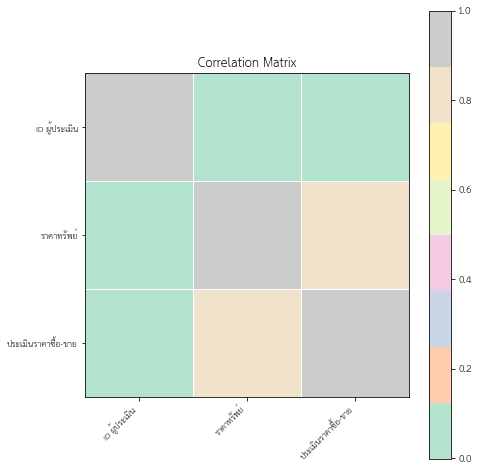

In [256]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

corr = data11.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns), cmap ='Pastel2')
plt.show()
###สีครีมมีค่าใกล้เคียง1 มีความสัมพันธ์กันอย่างมากในทิศทางเดียวกัน

 

In [257]:
import seaborn as sns

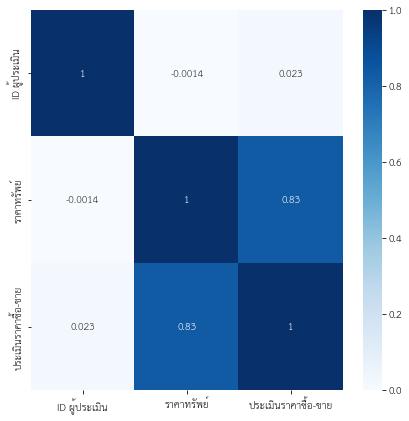

In [258]:
sns.heatmap(dcorr , cmap='Blues' , annot=True)


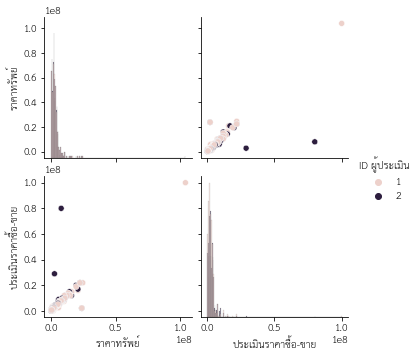

In [259]:
sns.pairplot(data11, hue="ID ผู้ประเมิน", diag_kind="hist")  
###จาก output ตัวแปรของราคาทรัพย์กับตัวแปรประเมินราคาซื้อ-ขายเพิ่มขึ้นไปในทิศทางเดียวกันแสดงว่ามีความสัมพันธ์กัน


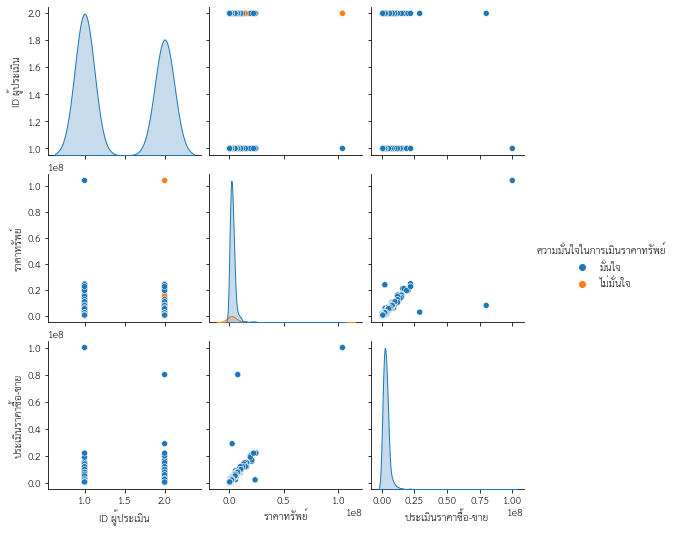

In [260]:
sns.pairplot(data11, hue="ความมั่นใจในการเมินราคาทรัพย์") 
### จากกราฟผู้ประเมินคนที่2จะมีคว่ามมั่นใจมากกว่าคนที่1

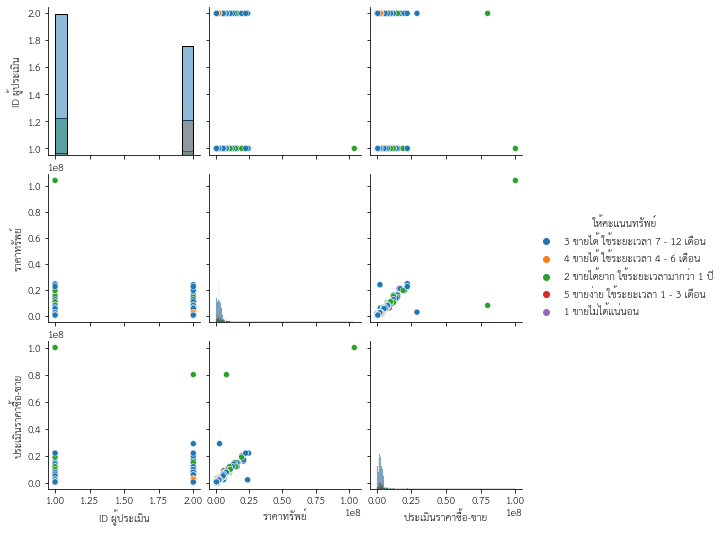

In [261]:
sns.pairplot(data11, hue="ให้คะแนนทรัพย์", diag_kind="hist") 
###ผู้ประเมินคนที่1 มีทั้งขายได้โดยใช้ระยะเวลา 7-12 เดือน และ สีเขียวที่ขายได้ยากใช้ระยะเวลามากกว่า 1 ปี (กราฟราคาทรัพย์)

###ที่ดิน

In [300]:
data21 = pd.read_excel(f'https://docs.google.com/spreadsheets/d/1HKaXLen6W4Y3Yc2nA2-CTmLG8tLE8Y2cL0mDkA_f5uI/export?format=xlsx', sheet_name ='ที่ดิน')
data21.corr(method='pearson')
dcorr = data21.corr()
dcorr.style.background_gradient ()
###สีเข้มมีความสัมพันธ์กันเยอะ (ฟ้า)

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ID ผู้ประเมิน,1.000000,0.023654,0.047823
ราคาทรัพย์,0.023654,1.000000,0.759001
ประเมินราคาซื้อ-ขาย,0.047823,0.759001,1.000000


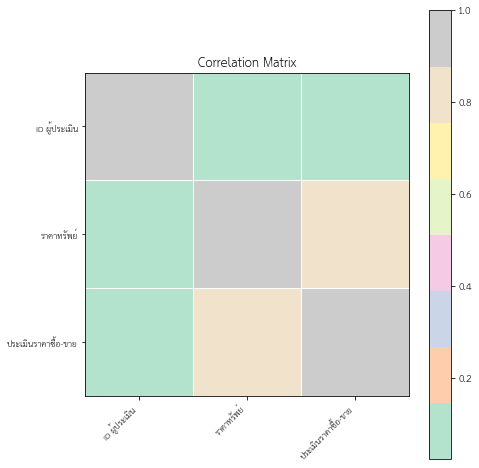

In [263]:
corr = data21.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns), cmap='Pastel2')
plt.show()
###สีครีมมีค่าใกล้เคียง1 มีความสัมพันธ์กันอย่างมากในทิศทางเดียวกัน

In [264]:
import seaborn as sns

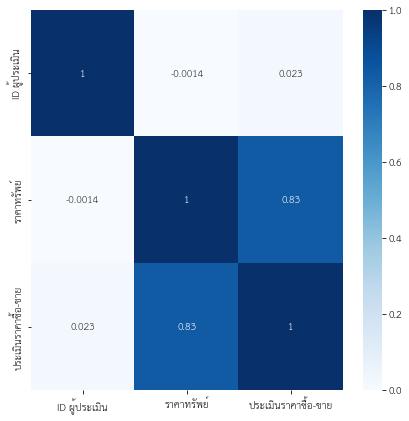

In [280]:
sns.heatmap(dcorr , cmap='Blues' , annot=True)

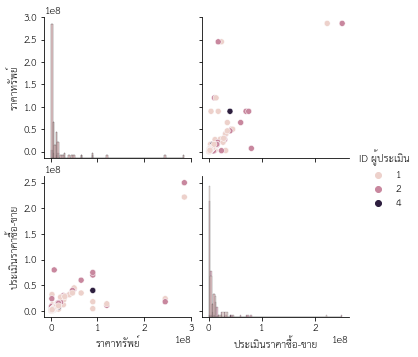

In [265]:
sns.pairplot(data21, hue="ID ผู้ประเมิน", diag_kind="hist") 
###ข้อมูลมีการกระจายมากมีความสัมพันธ์กันน้อย

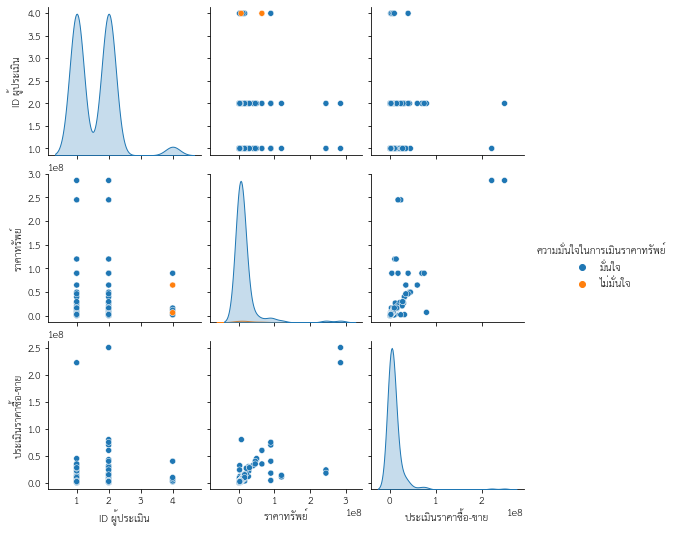

In [266]:
sns.pairplot(data21, hue="ความมั่นใจในการเมินราคาทรัพย์") 

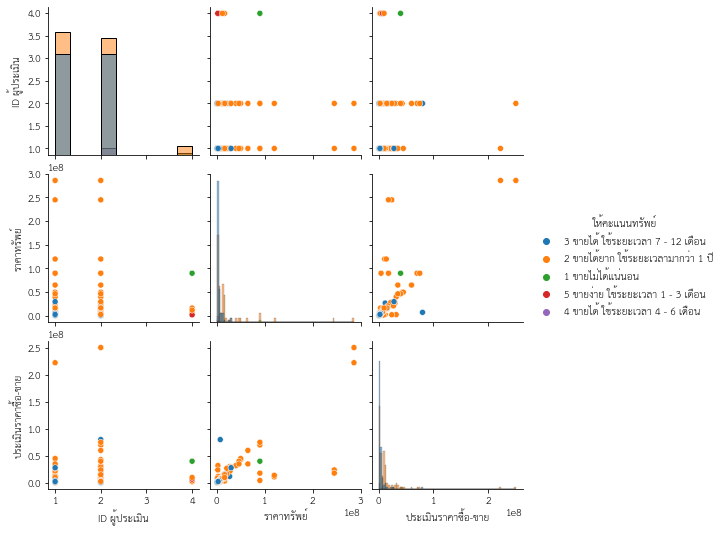

In [267]:
sns.pairplot(data21, hue="ให้คะแนนทรัพย์", diag_kind="hist") 

###ทาวน์โฮม

In [301]:
data41 = pd.read_excel(f'https://docs.google.com/spreadsheets/d/1HKaXLen6W4Y3Yc2nA2-CTmLG8tLE8Y2cL0mDkA_f5uI/export?format=xlsx', sheet_name ='ทาวน์โฮม')
data41 = data41[['ID ผู้ประเมิน','ราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์','ความมั่นใจในการเมินราคาทรัพย์']]
data41.corr(method='pearson')
dcorr = data41.corr()
dcorr.style.background_gradient ()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ID ผู้ประเมิน,1.000000,-0.000000,-0.006154
ราคาทรัพย์,-0.000000,1.000000,0.925450
ประเมินราคาซื้อ-ขาย,-0.006154,0.925450,1.000000


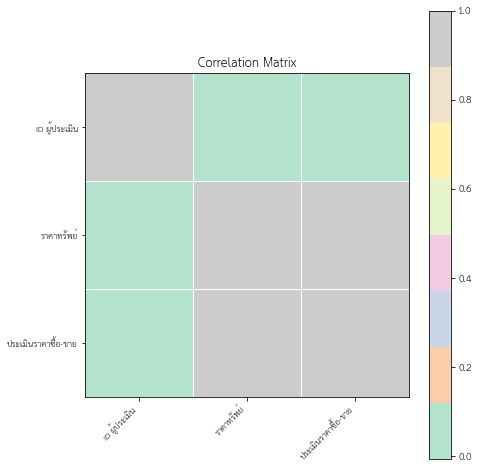

In [302]:
corr = data41.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns), cmap='Pastel2')
plt.show()

In [270]:
import seaborn as sns

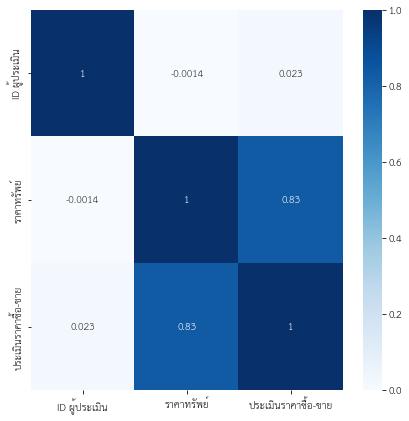

In [281]:
sns.heatmap(dcorr , cmap='Blues' , annot=True)

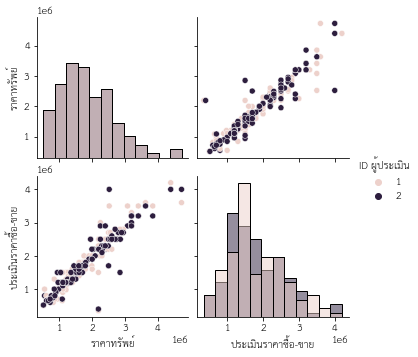

In [271]:
sns.pairplot(data41, hue="ID ผู้ประเมิน", diag_kind="hist") 
###จาก output ตัวแปรของราคาทรัพย์กับตัวแปรประเมินราคาซื้อ-ขายเพิ่มขึ้นไปในทิศทางเดียวกันแสดงว่ามีความสัมพันธ์กัน

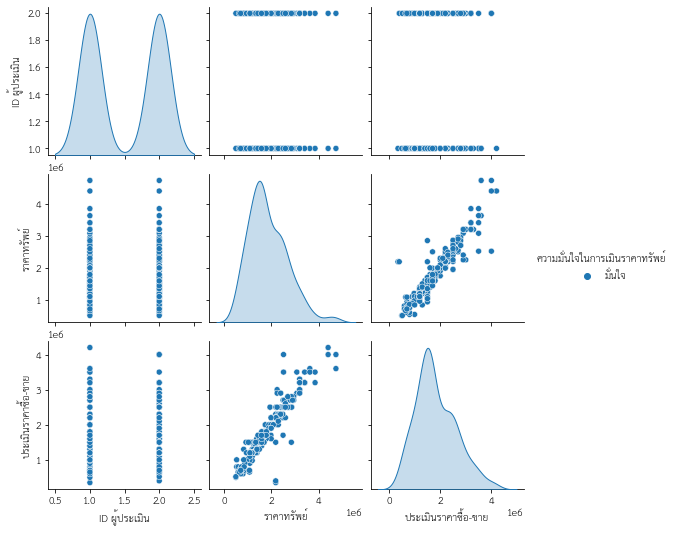

In [272]:
sns.pairplot(data41, hue="ความมั่นใจในการเมินราคาทรัพย์") 
###ผู้ประเมินคนที่1และ2มีความมั่นใจในการประเมินราคาทรัพย์

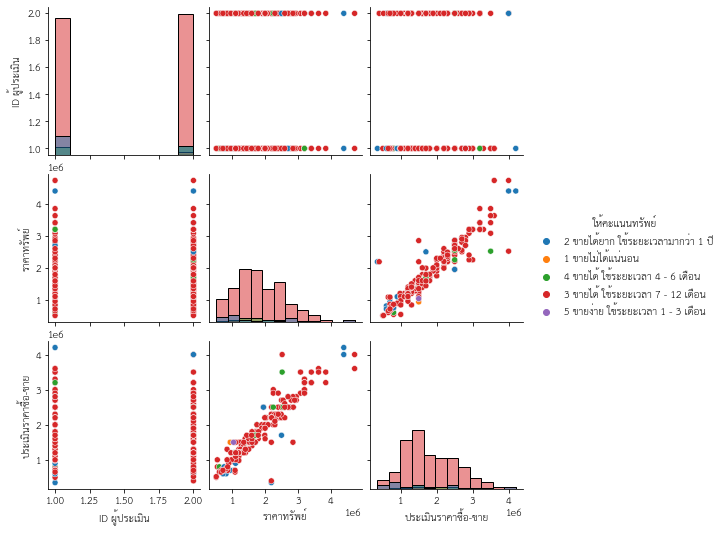

In [273]:
sns.pairplot(data41, hue="ให้คะแนนทรัพย์", diag_kind="hist") 
###จากกราฟผู้ประเมินคนที่1 การให้คะแนนทรัพย์ส่วนใหญ่จะขายได้ใช้ระยะเวลา 7-12 เดือน

###อาคารพาณิชย์

In [284]:
import pandas as pd

In [303]:
data51 =pd.read_excel(f'https://docs.google.com/spreadsheets/d/1HKaXLen6W4Y3Yc2nA2-CTmLG8tLE8Y2cL0mDkA_f5uI/export?format=xlsx', sheet_name ='อาคารพาณิชย์')
data51 = data51[['ID ผู้ประเมิน','ราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์','ความมั่นใจในการเมินราคาทรัพย์']]
data51.corr(method='pearson')
dcorr = data51.corr()
dcorr.style.background_gradient ()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ID ผู้ประเมิน,1.000000,0.000000,0.045325
ราคาทรัพย์,0.000000,1.000000,0.939407
ประเมินราคาซื้อ-ขาย,0.045325,0.939407,1.000000


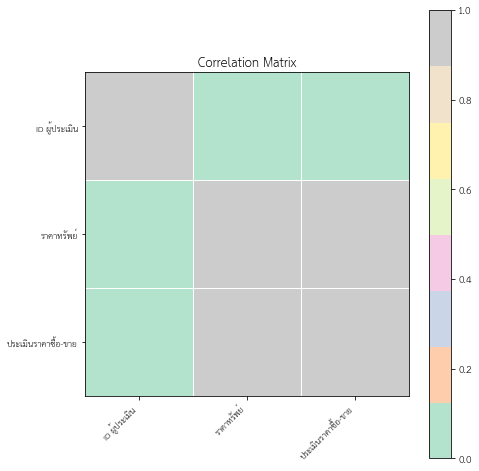

In [295]:
corr = data51.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns), cmap='Pastel2')
plt.show()

In [282]:
import seaborn as sns

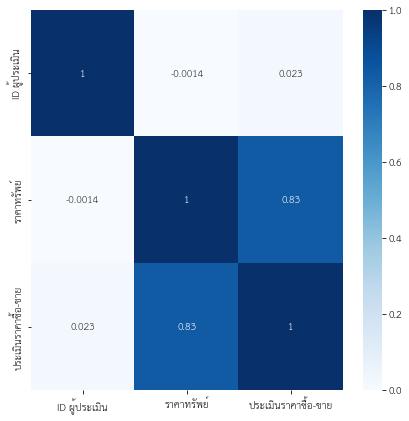

In [283]:
sns.heatmap(dcorr , cmap='Blues' , annot=True)

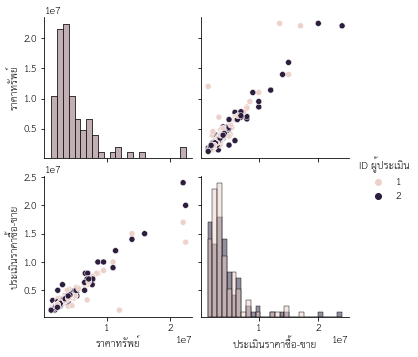

In [277]:
sns.pairplot(data51, hue="ID ผู้ประเมิน", diag_kind="hist") 
###จาก output ตัวแปรของราคาทรัพย์กับตัวแปรประเมินราคาซื้อ-ขายเพิ่มขึ้นไปในทิศทางเดียวกันแสดงว่ามีความสัมพันธ์กัน

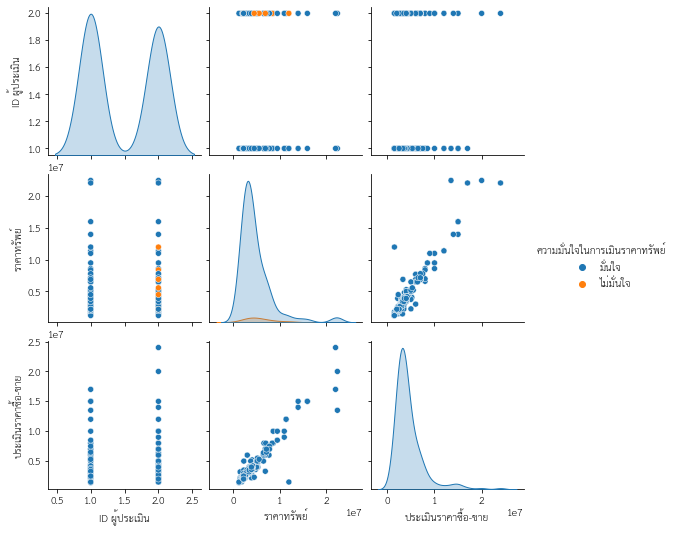

In [278]:
sns.pairplot(data51, hue="ความมั่นใจในการเมินราคาทรัพย์") 
###ผู้ประเมินคนที่ 1 มีความมั่นใจมากกว่าคนที่ 2
###ผู้ประเมินคนที่1มีความมั่นใจถึงประมาณ1.7 ผู้ประเมินคนที่ 2 มีความมั่นใจประมาณ 2

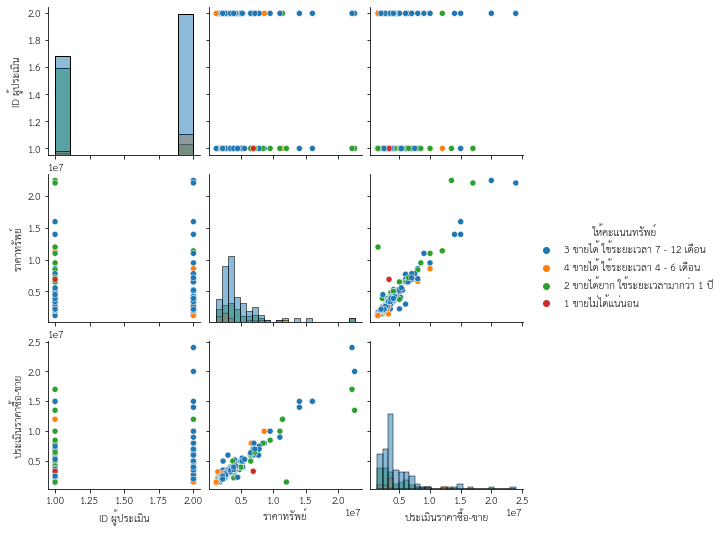

In [279]:
sns.pairplot(data51, hue="ให้คะแนนทรัพย์", diag_kind="hist")
###กราฟราคาทรัพย์>>ส่วนใหญ่ผู้ประเมินคนที่ 1  และ 2ขายได้ใช้ระยะเวลา 7-12 เดือน 
###กราฟประเมินราคาซื้อ-ขาย>> ส่วนใหญ่คนที่1ขายได้ยากใช้เวลามากกว่า 1 ปี ส่วนผู้ประเมินคนที่2 ส่วนใหญ่ขายได้ใช้ระยะเวลา 7-12